###  総合練習 (Comprehensive Exercise)

### 問題1.　Problem 1.

以下のパッケージをインポートする  
Use the following imports:  
```python  
   import numpy as np  
   import matplotlib.pyplot as plt  
```  
以下のタスクを完成せよ。  
a. **np.linspace()**関数を使って、-1と1間の値が均等に配置された500個の値を含む行ベクトルを作成し、meshPointsという変数に代入する。  
b. 以下の式を用いて、この500個の値に対応する正弦関数の値を計算し、変数yに代入する。  
    $$ y = sin(2\pi x) $$  
c. meshPointsとyを用いて、x軸とy軸のラベルが"x"と"y"とし、凡例が"Sinusoid line"にし、折れ線図を作成する。  
to complete the tasks:  
a. Use the **np.linspace()** function to create a row vector called meshPoints containing exactly 500 values with values evenly  
   spaced between -1 and 1.  
b. Compute sinusoidal values (variables y) against these 500 values with the following formula:  
   $$ y = sin(2\pi x) $$  
c. Produce a line plot with meshPoints and y including labels for the x- and y-axes with "x" and "y", and a legend with "Sinusoid line"

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__author__ = ""
__studentId__ = ""

meshPoints = np.linspace(-1, 1, 500)
y = np.sin(2 * np.pi * meshPoints)
plt.plot(meshPoints, y)
plt.show()

<Figure size 640x480 with 1 Axes>

### 問題2. 　Problem 2.

5行と5列と2つの対角の合計を含む12の合計が等しいことを確認します。  
Verify that 12 sums are equal including 5 row sums, 5 column sums and two diagonal sums  

$$
A = \left[
    \begin{array}{rrr}
     17 & 24 &  1&  8 & 15 \\  
     23 &  5 &  7 & 14 & 16 \\  
      4 &  6 & 13 & 20 & 22 \\  
     10 & 12 & 19 & 21 &  3 \\  
     11 & 18 & 25 &  2 &  9 
    \end{array}
  \right] \xrightarrow[\text{A[:, ::-1]}]{\text{np.fliplr(A)}} 
  \left[
    \begin{array}{rrr}
    15 &  8 &  1 & 24 & 17 \\
    16 & 14 &  7 &  5 & 23 \\
    22 & 20 & 13 &  6 &  4 \\
     3 & 21 & 19 & 12 & 10 \\
     9 & 2  & 25 & 18 & 11 \\
  \end{array}
  \right]
$$

~~~ python
A=np.array([[17, 24,  1,  8, 15],  
            [23,  5,  7, 14, 16],  
            [ 4,  6, 13, 20, 22],  
            [10, 12, 19, 21,  3],  
            [11, 18, 25,  2,  9]])
~~~

In [2]:
import numpy as np

__author__ = ""
__studentId__ = ""

A=np.array([[17, 24,  1,  8, 15],
            [23,  5,  7, 14, 16],
            [ 4,  6, 13, 20, 22],
            [10, 12, 19, 21,  3],
            [11, 18, 25,  2,  9]])

# Method 1 (Someone use np.diag, A[:, ::-1])
row_sums = np.unique(np.sum(A, axis=0))
col_sums = np.unique(np.sum(A, axis=1))
leading_diag = np.sum([row[i] for i,row in enumerate(A)])
counter_diag = np.sum([row[-i-1] for i, row in enumerate(A)])


if row_sums == col_sums == leading_diag == counter_diag:
    print("12 sums are equal.")
else:
    print("12 sums are not equal.")

# Method 2
row_sums = np.sum(A, axis=0)
col_sums = np.sum(A, axis=1)
leading_diag = np.sum([row[i] for i,row in enumerate(A)])
counter_diag = np.sum([row[-i-1] for i, row in enumerate(A)])

sums = np.hstack([row_sums,col_sums, leading_diag, counter_diag])
if len(np.unique(sums)) == 1:
    print("12 sums are equal.")
else:
    print("12 sums are not equal.")
print(A)
print(A[:, ::-1]) # Good
print(np.fliplr(A)) # Good

12 sums are equal.
12 sums are equal.
[[17 24  1  8 15]
 [23  5  7 14 16]
 [ 4  6 13 20 22]
 [10 12 19 21  3]
 [11 18 25  2  9]]
[[15  8  1 24 17]
 [16 14  7  5 23]
 [22 20 13  6  4]
 [ 3 21 19 12 10]
 [ 9  2 25 18 11]]
[[15  8  1 24 17]
 [16 14  7  5 23]
 [22 20 13  6  4]
 [ 3 21 19 12 10]
 [ 9  2 25 18 11]]


### 問題3. Problem 3.
以下のパッケージをインポートする  
Using the following imports:  
```python  
  import numpy as np  
  import pandas as pd  
```  
以下のタスクを完成せよ。
1. dataフォルダの下にあるprob2.txtという名前のファイルからデータをロードし、20x2 numpy配列として"data"に代入します。  
2. 配列"data"の転置を行い、転置されたデータをdfというpandas DataFrameに変換します。dfの列は 'A1'と 'A2'にします。  
3. DataFrameのメソッドを使用して列から箱ひげ図を作成し、外れ値があればその値をプリントアウトしてください。　　


Complete the tasks:  
1. Load data from a file named **prob2.txt** under the data folder and save it as a 20x2 numpy array called "data".  
2. Make a transpose of data, and convert the transposed data to a pandas DataFrame called df which its columns are denoted as 'A1' and 'A2'  
3. Produce a boxplot graph from columns using DataFrame's method, and print out the outliers point if available.

**正規分布（Normal Distribution）**: 
<table>
    <tr><td align="center"><img src="norm_dist.jpg" width="70%"></td></tr>
</table>

**標準化(Standardization)**:
$$
Z=\frac{x_{i} - \bar{x}}{\sigma}, \text{where }i=1\ldots n
$$

**分位数,クォンタイル(Quantile)**:  
<table><tr>
<td> <img src="boxplot_jp.png" alt="分位数" style="width: 450px;"/> </td>
<td> <img src="boxplot_en.png" alt="Quantile" style="width: 450px;"/> </td>
</tr></table>

A1, 2.300
     A1  A2
0   NaN NaN
1   NaN NaN
2   NaN NaN
3   NaN NaN
4   NaN NaN
5   NaN NaN
6   NaN NaN
7   NaN NaN
8   NaN NaN
9   NaN NaN
10  NaN NaN
11  NaN NaN
12  NaN NaN
13  NaN NaN
14  NaN NaN
15  NaN NaN
16  2.3 NaN
17  NaN NaN
18  NaN NaN
19  NaN NaN


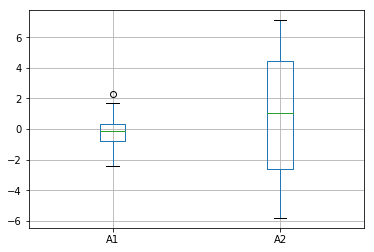

In [3]:
import numpy as np
import pandas as pd

__author__ = ""
__studentId__ = ""

f_name = "data/prob2.txt"
data = np.loadtxt(f_name, delimiter=",")
data = data.T
column_name = ['A1', 'A2']

# Convert to a dataframe
df = pd.DataFrame(data, columns=column_name)
# Produce a boxplot graph
df.boxplot(column=column_name)

# standardization: z scores
z_scores = ((df-df.mean())/df.std()).abs()
# print out suspected the first point of outliers
for col in df.columns:
    z = z_scores[col]
    outliers = df[(z > 2) | (z< -2)][col].tolist()
    if len(outliers) == 0:
        continue
    print("{}, {:.3f}".format(col, outliers[0]))

#  Quantile --- Very Good
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR
outliers = df['A1'].apply(lambda x:x > threshold)
print(df[outliers])

### 問題4. Problem 4.
次の表は、クラス内の学生の身長を示しています。  
The following table shows heights of students in a class  
<table border="1">
<thead>
<tr><th align="center">height (in cm)</th> <th align="center">frequency</th> </tr>
</thead>
<tbody>
<tr><td align="center">   120 $<-$ 130        </td> <td align="center">   2            </td> </tr>
<tr><td align="center">   130 $<-$ 140        </td> <td align="center">   5            </td> </tr>
<tr><td align="center">   140 $<-$ 150        </td> <td align="center">   25           </td> </tr>
<tr><td align="center">   150 $<-$ 160        </td> <td align="center">   10           </td> </tr>
<tr><td align="center">   160 $<-$ 170        </td> <td align="center">   8            </td> </tr>
<tr><td align="center">   170 $<-$ 180        </td> <td align="center">   4            </td> </tr>
<tr><td align="center">   180 $<-$ 190        </td> <td align="center">   1            </td> </tr>
</tbody>
</table>

1. 身長の平均値を計算してください。   
2. 身長の標準偏差を計算してください。


1. Calculate mean of heights  
2. Calculate standard deviation of heights

In [4]:
import numpy as np

__author__ = ""
__studentId__ = ""

frequency = np.array([2, 5, 25, 10, 8, 4, 1])
heights = np.linspace(120, 190, len(frequency) + 1)
sum_fre = sum(frequency)
midpoints = heights[:-1] + (heights[1:] - heights[:-1])/2
mean_val = sum(midpoints * frequency) / sum_fre
std_val = np.sqrt(sum(((midpoints - mean_val)**2) * frequency) / sum_fre)
print("Mean: {:.3f}, STD: {:.3f}".format(mean_val, std_val))

Mean: 151.000, STD: 12.591


### 問題5. Problem 5.

$T = X_{1} + X_{2} + \ldots + X_{100}$とします。これらのランダム変数は独立しており、  
同様に分布された(i.i.d)。各ランダム変数は平均値5と分散4の正規分布に従います。中心極限定理によって、  
$P(X_{1} + X_{2} + \ldots + X_{100} > 549$)を計算しよう。  

**ヒント**：標準化とscipy.stats.norm.cdf()


Let $T = X_{1} + X_{2} + \ldots + X_{100}$. These random variables are independent and  
identically distributed (i.i.d), each following a normal distribution with mean of  
5 and variance of 4. Using central limit theorem, compute  
$P(X_{1} + X_{2} + \ldots + X_{100} > 549)$.  

**Hints**: Standardization and scipy.stats.norm.cdf()

The central  limit theory says that  
$$ T \approx N(n\mu,n\sigma^2) = N(100\times 5, 100\times 4) = N(500, 20^2) $$  
Standardizing we have  
$$ 
    P(X_{1} + X_{2} + \ldots + X_{100} > 549) = P(\frac{T-500}{20} > \frac{549 - 500}{20}) \\ 
    \approx P(Z > 2.45) \\
    \approx 0.00714
$$

In [5]:
import numpy as np
import scipy.stats as ss

__author__ = ""
__studentId__ = ""

N = 100
mu_iid = 5
sig_iid = 4
# T approximate to the N(mu, sigma^2)
mu = mu_iid * N
sigma = np.sqrt(N * sig_iid)
print("The distribution: N({:.3f}, {:.3f}^2)".format(mu, sigma))
val = 549
# Standardization: (X - mu)/sigma
std_val = (val - mu) / sigma
p_val = 1 - ss.norm.cdf(std_val)
print(std_val, p_val)

The distribution: N(500.000, 20.000^2)
2.45 0.007142810735271454


### 問題6. Problem 6.

梱包工場では、瓶が入ったカートンを機械で梱包します。新しいマシンが
現在使用されているマシンより平均的に速いと仮定します。
各マシンが10カートンをパックするのにかかる時間は、prob6.txtというファイルに記録されます。  
この仮説を5％有意水準で検定してください。

In a packing plant, a machine packs cartons with jars. It is supposed that a new machine will  
pack faster on the average than the machine currently used. To test that hypothesis at the 5% significant level,  
the times it takes each machine to pack ten cartons are recorded into a file, prob6.txt.

解説：  

**Assumption 1**. Are these independent samples? Yes, since the samples from the two machines are not related.  
**Assumption 2**. Are these large samples or a normal population? We have n1<30, n2<30. We do not have large enough samples and thus we need to check the normality assumption from both populations.  
**Assumption 3**: Do the populations have equal variance? Yes, since s1 and s2 are not that different. How do conclude this?  By using a rule of thumb where the ratio of the two sample standard deviations is from 0.5 to 2.  (They are not that different as s1/s2=0.683/0.750=0.91 is quite close to 1.)


In [6]:
import numpy as np
import scipy.stats as ss

__author__ = ""
__studentId__ = ""

dat_file = "data/prob6.txt"
data = np.loadtxt(dat_file, skiprows=1)
# means
m1, m2 = np.mean(data, axis=0)
print("Means: {}, {}".format(m1, m2))
# equal variance
s1 = np.std(data[:,0])
s2 = np.std(data[:,1])
print("The ratio of variance: {}/{}={:.3f}".format(s1, s2, s1/s2))

# Critical value at 0.05
df = len(data[:, 0]) + len(data[:, 1]) - 2
alpha = 0.05
critical_value = ss.t.ppf(alpha, df)
w, p = ss.ttest_ind(data[:,0], data[:, 1], equal_var=True)

if w < critical_value:
    print("Reject H0 at alpha={:.3f}, df={}".format(alpha, df))
else:
    print("Retain H0 at alpha={:.3f}, df={}".format(alpha, df))

# Conclusion
print("At 5% level of significance, there is sufficient evidence that the new machine packs faster than the old machine on average.")

Means: 42.14, 43.230000000000004
The ratio of variance: 0.6483826030978941/0.7114070564732956=0.911
Reject H0 at alpha=0.050, df=18
At 5% level of significance, there is sufficient evidence that the new machine packs faster than the old machine on average.


### 問題7. Problem 7.

ある会社のマネジャーは、1日の3つのシフトの間に仕上がりの品質に違いがあるかどうかを判断したいと考えています。  
彼女は無作為に製品を選んで慎重に検査します。2つのカテゴリ変数は、shift（shift1、shift2、shift3）とcondition（perfect、Satisfactory、Defective）です。データ（prob7.txt）に二元配置テーブルをまとめていた。このデータは、3つのシフトの間に質の差があるかどうかは   
5％有意水準で検定すると十分な証拠を提供しているか？

The manager of a company wants to determine whether there are any differences in the quality of workmanship among the three daily shifts. She randomly selects their products and carefully inspects them. The two categorical variables of interest are: shift(shift1, shift2, shift3) and condition(perfect, Satisfactory, Defective). The data (prob7.txt) can be summarized by the accompanying two-way table. Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in quality among the three shifts?

<table border="1">
<thead>
<tr><th align="center"></th><th align="center">Perfect</th> <th align="center">Satisfactory</th> <th align="center">Defective</th></tr>
</thead>
<tbody>
<tr><td align="center">shift1</td><td align="center">106</td> <td align="center">124</td><td align="center">6</td> </tr>
<tr><td align="center">shift2</td><td align="center">67</td> <td align="center">85</td><td align="center">7</td> </tr>
<tr><td align="center">shift3</td><td align="center">37</td> <td align="center">72</td><td align="center">5</td> </tr>
</tbody>
</table>

2つ以上の分類基準を持つクロス集計表において、分類基準間に関連があるかどうかを検定することを独立性の検定といいます。

~~~ python
chi2, p, dof, expected = chi2_contingency(observed, correction=True, lambda_=None)

observed: クロス集計表。The contingency table.
correction: Trueと自由度が１の場合, Yates’連続性補正を行う。If True, and the degrees of freedom is 1, apply Yates’ correction 
                  for continuity.
lambda_: default is Pearson’s chi-squared statistic 

chi2: 統計検定量。The test statistic.
p: p値。The p-value of the test.
dof:自由度。Degrees of freedom.
expected: 期待される度数。 The expected frequencies, based on the marginal sums of the table. 
~~~


In [7]:
import numpy as np
import scipy.stats as ss

__author__ = ""
__studentId__ = ""

datafile = "data/prob7.txt"
data = np.loadtxt(datafile, skiprows=1)

r, c = data.shape
df = (r - 1) * (c - 1)
# significant level of 0.05
alpha = 0.05
chi_c = ss.chi2.ppf(1 - alpha, df)
print("critical value (df={}):{}".format(df, chi_c))

chi2, p, dof, expected = ss.chi2_contingency(data)
print("Statistic: {}".format(chi2))
print("p: {}".format(p))
print("df: {}".format(dof))
print("expected: {}".format(expected))

### Result
if chi_c >= chi2:
    print("Retain the null hypothesis by chi test statistic.")
else:
    print("Reject the null hypothesis by chi test statistic.")
if p > 0.05:
    print("There isn't a significant result at 5% significance level since the p-value ({}) is greater than 0.05".format(p))
else:
    print("There is a significant result at 5% significance level since the p-value ({}) is greater than 0.05".format(p))

critical value (df=4):9.487729036781154
Statistic: 5.861947681249834
p: 0.20969804816985732
df: 4
expected: [[ 97.36738703 130.28683694   8.34577603]
 [ 65.59921415  87.77799607   5.62278978]
 [ 47.03339882  62.93516699   4.03143418]]
Retain the null hypothesis by chi test statistic.
There isn't a significant result at 5% significance level since the p-value (0.20969804816985732) is greater than 0.05


### 問題8. Problem 8.

データ（prob8.txt）には、10回の異なるロットの歯車直径の10個測定値が含まれ、合計100回の測定が行われます。5％有意水準でグループ間の平均を持ちますか？ （statsmodelsパッケージを使用）

The data set (prob8.txt) contains 10 measurements of gear diameter for ten different batches for a total of 100 measurements. Are means the same across groups in the data at the 5% significance level? (using statsmodels package)

#### Note: 変数batchは10レベルがある。ー＞一元配置分散分析

1. Scipy's f_oneway()関数:
~~~ python
f_val, p_value = scipy.stats.f_oneway(*args) 
　　sample1, sample2, ... : 各グループの標本データ
      f_val: F値
　　p_value: p値
~~~
使用条件：  
 1. 各標本は独立した。  
 2. 各標本は正規分布に従う母集団からのものです。  
 3. 各グループの母集団の標準偏差はすべて等しい。いわゆる等分散性です。  
 
2. Statsmodel's anvova_lm()関数  
~~~ python
aov_table = anvova_lm(fitted_result, scale=None, test="F", typ=1, robust=None) 
~~~

In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

__author__ = ""
__studentId__ = ""

datafile = "data/prob8.txt"
data_frame = pd.read_csv(datafile, comment="#",sep="\s+", header=0)
print(data_frame.columns)
f='diameter ~ C(batch)'
model = ols(formula=f, data=data_frame)
res = model.fit()
# one-way ANOVA by anova_lm
aov_table = sm.stats.anova_lm(res, typ=2)
print(aov_table)
p_val = aov_table.at['C(batch)', 'PR(>F)']
if p_val > 0.05:
    print("Retain H0 hypothesis; means are equal across group.")
else:
    print("Reject H0 hypothesis; means aren't equal across group.")

Index(['diameter', 'batch'], dtype='object')
            sum_sq    df         F    PR(>F)
C(batch)  0.000729   9.0  2.296912  0.022661
Residual  0.003174  90.0       NaN       NaN
Reject H0 hypothesis; means aren't equal across group.


### 問題9. Problem 9.

ある研究データ（prob9.csv）は、肥満に対する身体活動の影響を測定することです。参加者は、1 =非常に活動的ではなく、2 =いくらか活動的であり、3 =非常に活動的である3つレベルで活動について評価された。さらに、参加者の人種（1または2のいずれか）がBMI（Body Mass Index）と共に記録されました。5％有意水準で次の3つの質問を答えてください：  

1. ２つの人種に対して、BMIの平均は同じですか？  
2. 身体活動の3つレベルに対して、BMIの平均は同じですか？  
3. 人種によって、活動のレベルの影響が異なるか？また、同等に活動のレベルによって、人種の影響が異なるか？  

(**注**:人種と活動の間に相互作用があった場合、講義に示すようなinteraction plotを作成してください)

A study (prob9.csv) is to determine the effects of physical activity on obesity. Subjects were rated for their physical activity on a three point scale with 1=not very active, 2=somewhat active, and 3=very active. In addition, the race (either 1 or 2) of the participant was recorded, along with their Body Mass Index (BMI). We want to answer the following three questions at the 5% significant level:  
1. Were the means for BMI the same for the two races?  
2. Were the means for BMI the same for the three activity levels?  
3. Is the effect of activity level different depending on race?, or equivalently Is the effect of race different depending on activity level?  
(**Note**: if there were interactions between race and activity, produce a interaction plot as shown in the lecture.)

Overall model F(5,1865) = 37.690, p = 0.0000


,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(race),2768.883546,2768.883546,1.0,79.969795,8.933922e-19,0.039378,0.038866
C(activity),2671.619408,1335.809704,2.0,38.580325,3.820424e-17,0.037995,0.036992
C(race):C(activity),301.285053,150.642526,2.0,4.350798,1.302768e-02,0.004285,0.003298
Residual,64573.978229,34.624117,1865.0,NaN,NaN,NaN,NaN


The interaction term is significant.


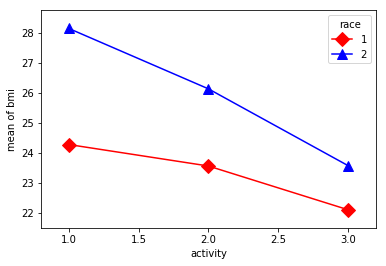

In [9]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
# For multiple comparison
import statsmodels.stats.multicomp as mlpc
# Plot interaction
from statsmodels.graphics.factorplots import interaction_plot

__author__ = ""
__studentId__ = ""

# 効果量 　Calculate effect size
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/ \
             (sum(aov['sum_sq'])+aov['mean_sq'][-1])
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

datafile = "data/prob9.csv"
data_frame = pd.read_csv(datafile, sep=",", header=0)
f = 'bmi ~ C(race) * C(activity)'
model = ols(formula=f, data=data_frame)
# 2. regression
result = model.fit()
print("Overall model F({:.0f},{:.0f}) = {:.3f}, p = {:.4f}".format(
      result.df_model, result.df_resid, result.fvalue, result.f_pvalue))
# 3.anova_lm()による二元配置分散分析 Conduct a two-way ANOVA by anova_lm()
anova_tbl = sm.stats.anova_lm(result, typ=2)
display(anova_table(anova_tbl))
pval_inter = anova_tbl.at["C(race):C(activity)", "PR(>F)"]
if pval_inter < 0.05:
    print("The interaction term is significant.")
    fig = interaction_plot(data_frame['activity'],
                       data_frame['race'],
                       data_frame['bmi'],
                       colors=['red','blue'],
                       markers=['D', '^'],
                       ms=10)
    plt.show()
else:
    print("The interaction term is not significant.")

主効果　Main effects

In [10]:
# 1. interaction
f = 'bmi ~ C(race) + C(activity)'
model2 = ols(formula=f, data=data_frame)

# 2. regression
result2 = model2.fit()
print("Overall model F({:.0f},{:.0f}) = {:.3f}, p = {:.4f}".format(
      result2.df_model, result2.df_resid, result2.fvalue, result2.f_pvalue))

# 3. anova_lm()による二元配置分散分析 Conduct a two-way ANOVA by anova_lm()
anova_tbl2 = sm.stats.anova_lm(result2, typ=2)
display(anova_table(anova_tbl2))
pval_race = anova_tbl2.at["C(race)", "PR(>F)"]
pval_activity = anova_tbl2.at["C(activity)", "PR(>F)"]

if pval_race < 0.05:
    print("Factor race DOES have an independent significant effect on the mean bmi")
else:
    print("Factor race DOESN'T have an independent significant effect on the mean bmi.")

if pval_activity < 0.05:
    print("Factor activity DOES have an independent significant effect on the mean bmi")
else:
    print("Factor activity DOESN'T have an independent significant effect on the mean bmi.")

Overall model F(3,1867) = 59.702, p = 0.0000


,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(race),2768.883546,2768.883546,1.0,79.683770,1.025525e-18,0.039378,0.038864
C(activity),2671.619408,1335.809704,2.0,38.442337,4.358260e-17,0.037995,0.036988
Residual,64875.263282,34.748400,1867.0,NaN,NaN,NaN,NaN


Factor race DOES have an independent significant effect on the mean bmi
Factor activity DOES have an independent significant effect on the mean bmi


Post-hoc Testing

In [11]:
# multiple comparison by Tukey HSD
mc_race = mlpc.MultiComparison(data_frame['bmi'], data_frame['race'])
result_race = mc_race.tukeyhsd()
print(result_race)

mc_activity = mlpc.MultiComparison(data_frame['bmi'], data_frame['activity'])
result_activity = mc_activity.tukeyhsd()
print(result_activity)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  1      2     2.7571  2.2117 3.3025  True 
-------------------------------------------
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -1.6087  -2.5083 -0.7092  True 
  1      3     -3.839  -4.8086 -2.8694  True 
  2      3    -2.2303  -2.9712 -1.4893  True 
---------------------------------------------
